In [5]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [6]:
from scipy.io import wavfile

In [7]:
rate, x = wavfile.read('test.wav')

In [8]:
rate

44100

In [9]:
y = []
for i in range(44100):
    y.append(x[i])

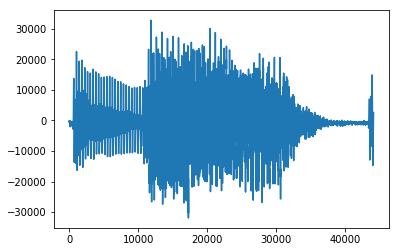

In [6]:
plt.plot(y)

In [7]:
from scipy.fftpack import fft,ifft,dct,idct

In [8]:
c = dct(y)
ym = idct(c)/88200

In [9]:
ym

array([-456., -463., -353., ..., 2197., 2384., 2570.])

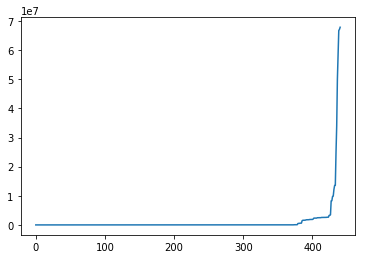

In [10]:
Cl = []
for L in range(1,442):
    cm = []
    sum = 0
    for i in range(44100-(100*L)):
        cm.append(c[i])
    for i in range(44100-(100*L),44100):
        cm.append(0)
    xm = idct(cm)/(88200)
    for i in range(44100):
        sum = sum + ((y[i]-xm[i])**2)
        q = sum/44100
    Cl.append(q)
plt.plot(Cl)

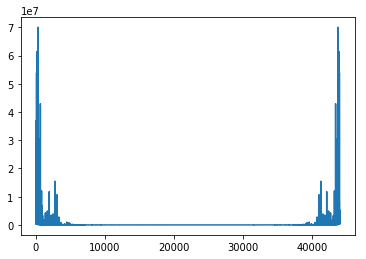

In [11]:
z = fft(y)
plt.plot(abs(z))

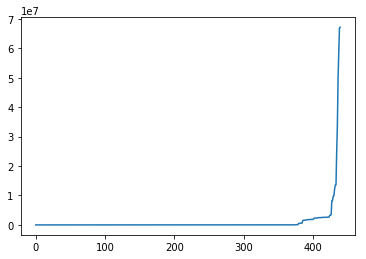

In [14]:

Dl = []
L = np.arange(100,44100,100)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((44101-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((44101-L[j])/2),math.ceil((44101+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((44101+L[j])/2),44100):
        zm.append(z[i])
    dm = ifft(zm)
    for i in range(44100):
        sum = sum + ((abs(y[i]-dm[i]))**2)
        q = sum/44100
    Dl.append(q)
plt.plot(Dl)

ERROR! Session/line number was not unique in database. History logging moved to new session 53


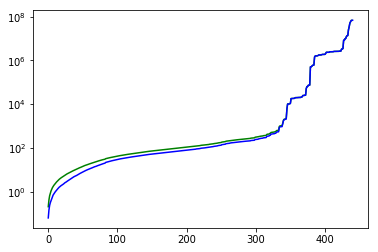

In [36]:
plt.semilogy(Dl,color='green')
plt.semilogy(Cl,color='blue')

In [20]:
import pywt

In [40]:
a,d = pywt.dwt(y,'haar')

In [109]:
at = pywt._thresholding.threshold(a,0,'soft')
a

array([-649.83113191, -412.95036021, -299.81327522, ..., 2449.41789003,
       2975.50533523, 3503.006994  ])

In [3]:
import scipy
from scipy import signal

In [33]:
import pywt

In [34]:
wp = pywt.WaveletPacket(y,'haar','symmetric')